In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import tensorflow 
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [ ]:
EPOCH = 10
BATCH_SIZE = 32
STEPS_PER_EPOCH = 128

In [ ]:
training_dir = '/content/drive/MyDrive/Dataset/Data Agro/train'
validation_dir = '/content/drive/MyDrive/Dataset/Data Agro/val'

In [ ]:
training_set = ImageDataGenerator(
    rescale = 1/255.5,
    zoom_range=0.2
)
training_data = training_set.flow_from_directory(
    training_dir,
    target_size = (224,224),
    class_mode = "categorical",
    batch_size = BATCH_SIZE
)

Found 4800 images belonging to 5 classes.


In [ ]:
validation_set = ImageDataGenerator(
    rescale = 1/255.5,
    zoom_range=0.2
)
validation_data = validation_set.flow_from_directory(
    validation_dir,
    target_size = (224,224),
    class_mode = "categorical",
    batch_size = BATCH_SIZE
)

Found 600 images belonging to 5 classes.


In [ ]:
categories = training_data.class_indices.keys()
print(categories)

dict_keys(['bukan_daun', 'daun_bercak', 'daun_berlubang', 'daun_busuk', 'daun_sehat'])


# Mobile Net V1

In [ ]:
mobilenet1 = keras.applications.mobilenet.MobileNet(
    include_top = False,
    input_shape = (224,224,3)
    )
mobilenet1.trainable = False

In [ ]:
import keras.callbacks as callbacks
early_stopping_cb = callbacks.EarlyStopping(monitor="loss", patience=3)

In [ ]:

input_layer = keras.Input(shape = (224,224,3))
x = mobilenet1(input_layer,training = False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(1024,activation='relu')(x)
output_layer = keras.layers.Dense(len(categories),activation="softmax")(x)
model2 = Model(inputs = input_layer, outputs = output_layer)
model2.summary()
model2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["Accuracy"])
result2 = model2.fit(
    training_data,
    validation_data = validation_data,
    epochs = EPOCH,
    steps_per_epoch = STEPS_PER_EPOCH,
    callbacks=[early_stopping_cb]
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 5)                 5125

In [ ]:
model2.save('mobilenetv1.h5')

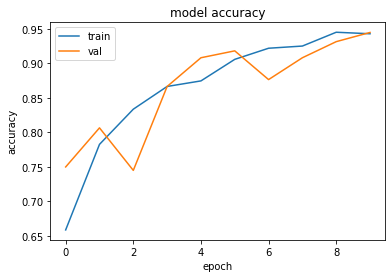

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

In [ ]:
plt.plot(result2.history['Accuracy'])
plt.plot(result2.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt

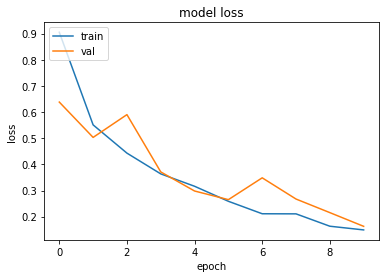

In [ ]:
plt.plot(result2.history['loss'])
plt.plot(result2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# MobileNet V2

In [ ]:
mobilenetv2 = keras.applications.mobilenet_v2.MobileNetV2(
    include_top = False,
    input_shape = (224,224,3)
    )
mobilenetv2.trainable = False

In [ ]:
input_layer = keras.Input(shape = (224,224,3))
x = mobilenetv2(input_layer,training = False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(1024,activation='relu')(x)
output_layer = keras.layers.Dense(len(categories),activation="softmax")(x)
model4 = Model(inputs = input_layer, outputs = output_layer)
model4.summary()
model4.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["Accuracy"])
result4 = model4.fit(
    training_data,
    validation_data = validation_data,
    epochs = EPOCH,
    steps_per_epoch = STEPS_PER_EPOCH
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1311744   
                                                                 
 dense_3 (Dense)             (None, 5)                 5125

In [ ]:
model4.save('mobilenetv2.h5')

In [ ]:
plt.plot(result4.history['Accuracy'])
plt.plot(result4.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(result4.history['loss'])
plt.plot(result4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()